# 1. Getting and Knowing your Data


This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.
## Get to know the data
### Step 1. Import the necessary libraries

In [2]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user). 

### Step 3. Assign it to a variable called users and use the 'user_id' as index

In [84]:
users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', 
                      sep='|', index_col='user_id')

### Step 4. See the first 25 entries

In [40]:
# users.head(25)
#
users.iloc[:25]


,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
6,42,M,executive,98101
7,57,M,administrator,91344
8,36,M,administrator,05201
9,29,M,student,01002


### See the all columns without last 1 column

In [47]:
users.iloc[:, :-1]

,age,gender,occupation
user_id,,,
1,24,M,technician
2,53,F,other
3,23,M,writer
4,24,M,technician
5,33,F,other
...,...,...,...
939,26,F,student
940,32,M,administrator
941,20,M,student


### Step 5. See the last 10 entries

In [5]:
users.tail(10)

,age,gender,occupation,zip_code
user_id,,,,
934,61,M,engineer,22902
935,42,M,doctor,66221
936,24,M,other,32789
937,48,M,educator,98072
938,38,F,technician,55038
939,26,F,student,33319
940,32,M,administrator,02215
941,20,M,student,97229
942,48,F,librarian,78209


### See the last column

In [48]:
users.iloc[:,-1]

user_id
1      85711
2      94043
3      32067
4      43537
5      15213
       ...  
939    33319
940    02215
941    97229
942    78209
943    77841
Name: zip_code, Length: 943, dtype: object

### Step 6. What are basic observations of the dataset?

In [6]:
# The size of the dataset
users.shape

(943, 4)

In [7]:
# What are the columns
users.columns

Index(['age', 'gender', 'occupation', 'zip_code'], dtype='object')

In [8]:
# info of the indexes (user_id)
users.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            934, 935, 936, 937, 938, 939, 940, 941, 942, 943],
           dtype='int64', name='user_id', length=943)

In [9]:
# data type of each column
users.dtypes

age            int64
gender        object
occupation    object
zip_code      object
dtype: object

In [30]:
# Statistical description
# Notice: by default, only the numeric columns are returned. 
users.describe() 

,age
count,943.000000
mean,34.051962
std,12.192740
min,7.000000
25%,25.000000
50%,31.000000
75%,43.000000
max,73.000000


In [31]:
# Statistical description of all 
users.describe(include = "all") #Notice: By default, only the numeric columns are returned.


,age,gender,occupation,zip_code
count,943.000000,943,943,943
unique,NaN,2,21,795
top,NaN,M,student,55414
freq,NaN,670,196,9
mean,34.051962,NaN,NaN,NaN
std,12.192740,NaN,NaN,NaN
min,7.000000,NaN,NaN,NaN
25%,25.000000,NaN,NaN,NaN
50%,31.000000,NaN,NaN,NaN
75%,43.000000,NaN,NaN,NaN


In [33]:
users.occupation.describe() #Notice: By default, only the numeric columns are returned.


count         943
unique         21
top       student
freq          196
Name: occupation, dtype: object

**Here**, we can know the basic info of the dataset, such as the size of dataset, columns, index, data types of each columns, statistical description as required.

### Step 7. What is advanced observation of the target(label/y)?

In [18]:
# What are the labels
users.occupation.unique()
#or
users['occupation'].unique()

array(['technician', 'other', 'writer', 'executive', 'administrator',
       'student', 'lawyer', 'educator', 'scientist', 'entertainment',
       'programmer', 'librarian', 'homemaker', 'artist', 'engineer',
       'marketing', 'none', 'healthcare', 'retired', 'salesman', 'doctor'],
      dtype=object)

In [13]:
# number of unique targets
users.occupation.nunique()

# or

users.occupation.value_counts().count()

21

### the most frequent occurrences
### 1. Use pie 

In [25]:

import matplotlib.pyplot as plt

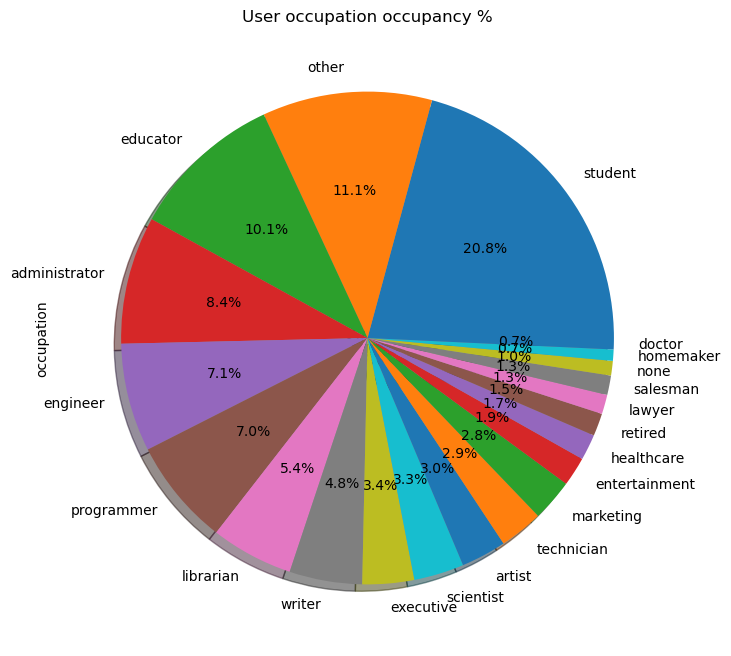

In [28]:
# observe the occupancy of each targets
users['occupation'].value_counts().plot.pie( autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.title("User occupation occupancy %")
plt.show()

***Here***, we can know the advanced info of the targets, such as what are the targets, how many in total, and the distribution of it.

We can also see from the figure, student is with the biggest occupancy while doctor is the least.

But if you dont want to use pie to show all the info, you can use:

### 2. Use value_counts() 

In [29]:
users.occupation.value_counts().head(1).index[0]

#or
#to have the top 5
# users.occupation.value_counts().head()

'student'

### 3. Use idxman() 


In [127]:
occupation_amount = users.groupby("occupation").sum()
occupation_amount.age.idxmax()

/var/folders/0m/hd5nyhdj19b3dcxl72fwby3c0000gn/T/ipykernel_15878/1266832641.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  occupation_amount = users.groupby("occupation").sum()


'student'

### 4. Use max() 


In [129]:
occupation_amount[occupation_amount.age == occupation_amount.age.max()]


,age
occupation,
student,4328


### Step 8. What is the statistical information of each occupation

In [37]:
users.groupby('occupation').describe()


age                                                      
               count       mean        std   min    25%   50%    75%   max
occupation                                                                
administrator   79.0  38.746835  11.123397  21.0  30.00  37.0  48.00  70.0
artist          28.0  31.392857   8.668116  19.0  25.00  30.0  39.00  48.0
doctor           7.0  43.571429  12.501428  28.0  35.50  45.0  48.50  64.0
educator        95.0  42.010526  10.413264  23.0  33.00  42.0  50.00  63.0
engineer        67.0  36.388060  11.199236  22.0  28.00  36.0  43.00  70.0
entertainment   18.0  29.222222  10.056052  15.0  23.00  25.0  33.00  50.0
executive       32.0  38.718750  10.608075  22.0  31.00  38.5  46.00  69.0
healthcare      16.0  41.562500  11.313524  22.0  30.50  44.5  49.25  62.0
homemaker        7.0  32.571429  10.737119  20.0  24.50  32.0  38.50  50.0
lawyer          12.0  36.750000  10.830303  21.0  28.75  34.0  47.75  53.0
librarian       51.0  40.000000  11.023611  23.0  30.00  39.0  49.00  69.0
marketing       26.0  37.615385   9.474500  24.0  30.25  36.0  42.50  55.0
none             9.0  26.555556  13.757826  11.0  16.00  26.0  33.00  55.0
other          105.0  34.523810  10.738227  13.0  26.00  32.0  44.00  64.0
programmer      66.0  33.121212   9.624512  20.0  27.00  30.0  38.00  63.0
retired         14.0  63.071429   5.757461  51.0  60.00  63.0  67.25  73.0
salesman        12.0  35.666667  14.079859  18.0  28.25  34.0  38.25  66.0
scientist       31.0  35.548387   7.392964  23.0  30.00  37.0  40.00  55.0
student        196.0  22.081633   5.284081   7.0  19.00  21.0  25.00  42.0
technician      27.0  33.148148   9.867210  21.0  24.00  30.0  40.00  55.0
writer          45.0  36.311111  11.423306  18.0  26.00  36.0  48.00  60.0

In [46]:
# "the index" (aka "the labels")
users.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            934, 935, 936, 937, 938, 939, 940, 941, 942, 943],
           dtype='int64', name='user_id', length=943)

## 2. Filtering & Sorting

### Step 1. how many female employees in the work place between 25- 55?


In [14]:
users[((users['age'] > 24 )&( users['age']<56 ) & (users['gender']== 'F'))].count()

age           198
gender        198
occupation    198
zip_code      198
dtype: int64

### Step 2. what is the maximum age and minimum age of students?

In [30]:
students = users[users['occupation'] == 'student'].sort_values(by = ['age'])
students

,age,gender,occupation,zip_code
user_id,,,,
30,7,M,student,55436
471,10,M,student,77459
880,13,M,student,83702
674,13,F,student,55337
609,13,F,student,55106
...,...,...,...,...
742,35,M,student,29210
577,36,F,student,77845
861,38,F,student,14085


Hence, we obtained the yougest student is 7 years old and oldest one is a 42 years-old man.

### Step 3. Find what occupation is end with -ian?

In [37]:
users[users.occupation.str.endswith('ian')]['occupation'].unique()

array(['technician', 'librarian'], dtype=object)

### Step 4. Present only the age, gender, zipcode of educator and student

In [50]:
users.loc[users.occupation.isin(['educator','student']), ['age','gender', 'zip_code']]


,age,gender,zip_code
user_id,,,
9,29,M,01002
13,47,M,29206
15,49,F,97301
30,7,M,55436
32,28,F,78741
...,...,...,...
933,28,M,48105
937,48,M,98072
939,26,F,33319


## 3. Grouping

### Step 1. What is the average age of each occupation?

In [51]:
users.groupby('occupation').age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

### Step 2. For each occupation print the statistics for age.

In [52]:
users.groupby('occupation').age.describe()

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
administrator,79.0,38.746835,11.123397,21.0,30.00,37.0,48.00,70.0
artist,28.0,31.392857,8.668116,19.0,25.00,30.0,39.00,48.0
doctor,7.0,43.571429,12.501428,28.0,35.50,45.0,48.50,64.0
educator,95.0,42.010526,10.413264,23.0,33.00,42.0,50.00,63.0
engineer,67.0,36.388060,11.199236,22.0,28.00,36.0,43.00,70.0
entertainment,18.0,29.222222,10.056052,15.0,23.00,25.0,33.00,50.0
executive,32.0,38.718750,10.608075,22.0,31.00,38.5,46.00,69.0
healthcare,16.0,41.562500,11.313524,22.0,30.50,44.5,49.25,62.0
homemaker,7.0,32.571429,10.737119,20.0,24.50,32.0,38.50,50.0


### Step 3. Print the mean, min and max values for occupation.

In [53]:
users.groupby('occupation').agg(['mean', 'min', 'max'])

/var/folders/0m/hd5nyhdj19b3dcxl72fwby3c0000gn/T/ipykernel_15878/935683153.py:1: FutureWarning: ['gender', 'zip_code'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  users.groupby('occupation').agg(['mean', 'min', 'max'])


age        
                    mean min max
occupation                      
administrator  38.746835  21  70
artist         31.392857  19  48
doctor         43.571429  28  64
educator       42.010526  23  63
engineer       36.388060  22  70
entertainment  29.222222  15  50
executive      38.718750  22  69
healthcare     41.562500  22  62
homemaker      32.571429  20  50
lawyer         36.750000  21  53
librarian      40.000000  23  69
marketing      37.615385  24  55
none           26.555556  11  55
other          34.523810  13  64
programmer     33.121212  20  63
retired        63.071429  51  73
salesman       35.666667  18  66
scientist      35.548387  23  55
student        22.081633   7  42
technician     33.148148  21  55
writer         36.311111  18  60

### Step 4. Discover the Male ratio per occupation and sort it from the most to the least

In [93]:
male_occ = users[(users.gender == 'M')][['gender','occupation']].groupby('occupation').count()
male_occ.sort_values(by = 'occupation')
male_occ


,gender
occupation,
administrator,43
artist,15
doctor,7
educator,69
engineer,65
entertainment,16
executive,29
healthcare,5
homemaker,1


In [95]:
male_occ_amount = users[['gender','occupation']].groupby('occupation').count()
male_occ_amount.sort_values(by = 'occupation')

,gender
occupation,
administrator,79
artist,28
doctor,7
educator,95
engineer,67
entertainment,18
executive,32
healthcare,16
homemaker,7


In [101]:
radio = round(male_occ / male_occ_amount *100, 2)
radio

,gender
occupation,
administrator,54.43
artist,53.57
doctor,100.00
educator,72.63
engineer,97.01
entertainment,88.89
executive,90.62
healthcare,31.25
homemaker,14.29


### Step 5. For each combination of occupation and gender, calculate the mean age

In [76]:
users.groupby(['occupation', 'gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

### Step 6. For each occupation present the percentage of women and men

In [103]:
# create a data frame and apply count to gender
gender_ocup = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})
gender_ocup

gender
occupation    gender        
administrator F           36
              M           43
artist        F           13
              M           15
doctor        M            7
educator      F           26
              M           69
engineer      F            2
              M           65
entertainment F            2
              M           16
executive     F            3
              M           29
healthcare    F           11
              M            5
homemaker     F            6
              M            1
lawyer        F            2
              M           10
librarian     F           29
              M           22
marketing     F           10
              M           16
none          F            4
              M            5
other         F           36
              M           69
programmer    F            6
              M           60
retired       F            1
              M           13
salesman      F            3
              M            9
scientist     F            3
              M           28
student       F           60
              M          136
technician    F            1
              M           26
writer        F           19
              M           26

In [104]:

# create a DataFrame and apply count for each occupation
occup_count = users.groupby(['occupation']).agg('count')

# divide the gender_ocup per the occup_count and multiply per 100
occup_gender = gender_ocup.div(occup_count, level = "occupation") * 100

# present all rows from the 'gender column'
occup_gender.loc[: , 'gender']

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

## 4. Apply

### Step 1. Create a lambda function that will capitalize strings.

In [108]:
users.occupation.apply(lambda x: x.capitalize())

user_id
1         Technician
2              Other
3             Writer
4         Technician
5              Other
           ...      
939          Student
940    Administrator
941          Student
942        Librarian
943          Student
Name: occupation, Length: 943, dtype: object

### Step 2. Create a function called Mature that returns a boolean value to a new column called is_adults (Consider Mature as older than 17 years old)

In [109]:
def mature(x):
    if x >18:
        return True
    else:
        return False


In [110]:
users['is_adults'] = users['age'].apply(mature)
users.head()


,age,gender,occupation,zip_code,is_adults
user_id,,,,,
1,24,M,technician,85711,True
2,53,F,other,94043,True
3,23,M,writer,32067,True
4,24,M,technician,43537,True
5,33,F,other,15213,True


### Step 3. Multiply every number of the dataset by 10.

In [118]:
def times10(x):
    if x is int:
        return x*10
    else: 
        return x

In [120]:
new_table = users.applymap(times10).head(10)
new_table

,age,gender,occupation,zip_code,is_adults
user_id,,,,,
1,24,M,technician,85711,True
2,53,F,other,94043,True
3,23,M,writer,32067,True
4,24,M,technician,43537,True
5,33,F,other,15213,True
6,42,M,executive,98101,True
7,57,M,administrator,91344,True
8,36,M,administrator,05201,True
9,29,M,student,01002,True


Introduction to Pandas **apply**, **applymap** and **map**:
* apply() is used to apply a function along an axis of the DataFrame or on values of Series.
* applymap() is used to apply a function to a DataFrame elementwise.
* map() is used to substitute each value in a Series with another value.

5. Merge

6. Stats

1). Normal statistical info
.head(10)
del table['col']
table['col'].value_counts()
table.groupby("Name").sum()
table.sort_values(by = 'col', ascending = False/True)
table[table.col == table.col.median()]
table.col.std()

table.isnull().sum()
data.notnull().sum()



2). Time-series



7. Time-series